# Titanic Dataset Attributes:

- Survived: 0 = Not survived, 1 = Survived
- Pclass: Ticket class 1 = 1st class, 2 = 2nd class, 3 = 3rd class
- Name: Name of passenger
- Sex: male, female
- Age: Age of passenger
- Sibsp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Modules Used/Other:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train (2).csv")

In [ ]:
#save original data

original_data = df

In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# We need to deal with the missing values before moving onto ANN Model

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Age Missing Values:

In [ ]:
df["Age"].mean()

29.69911764705882

In [ ]:
df["Age"].median()

28.0

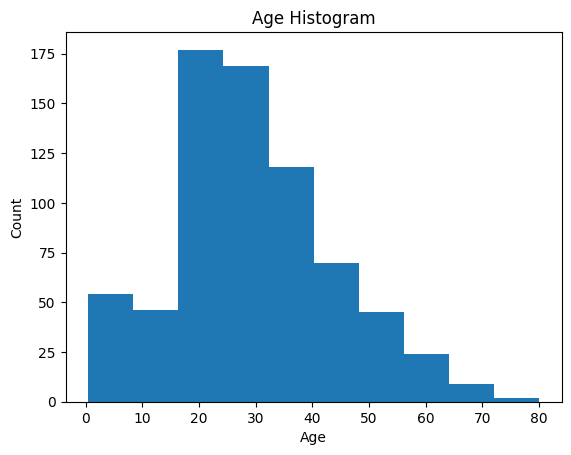

In [ ]:
df["Age"].plot(kind="hist")
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
#Let's use mean imputation to fill in Na values for Age:

df["Age"].fillna(df["Age"].mean(), inplace=True)

## Embarked Missing Values:

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

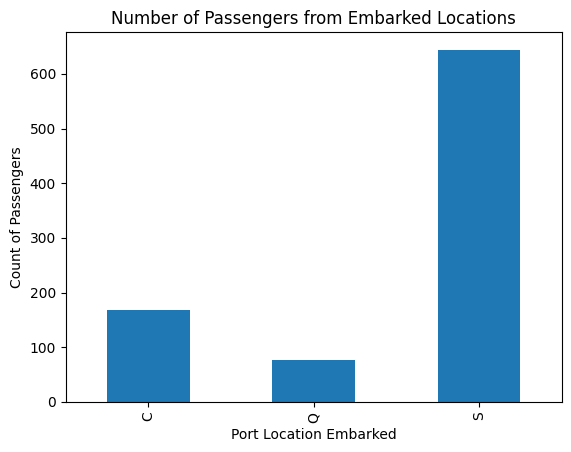

In [ ]:
df["PassengerId"].groupby(df["Embarked"]).count().plot(kind="bar")
plt.title("Number of Passengers from Embarked Locations")
plt.xlabel("Port Location Embarked")
plt.ylabel("Count of Passengers")
plt.show()

In [ ]:
#with S port being the most used by far, let's replace missing Embarked values with this

df["Embarked"].fillna("S", inplace=True)

## Cabin Missing Values:

In [ ]:
#For now, I'm dropping cabin from the df since there are so many missing values:

df.drop("Cabin", axis=1, inplace=True)

In [ ]:
#Let's also drop other columns not needed in df:

df.drop("Name", axis=1, inplace=True)

In [ ]:
#Let's also drop other columns not needed in df:

df.drop("Ticket", axis=1, inplace=True)

In [ ]:
#Let's check ALL missing values left now: 

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Let's check to make sure our is the way we want it

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Convert categorical variables into dummy variables:

In [ ]:
df["Pclass"] = df["Pclass"].astype("category")
df1 = pd.get_dummies(df)

In [ ]:
df1.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


# Scale Continuous Features:

In [ ]:
df1.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


- Survived: 0 = Not survived, 1 = Survived
- Pclass: Ticket class 1 = 1st class, 2 = 2nd class, 3 = 3rd class
- Name: Name of passenger
- Sex: male, female
- Age: Age of passenger
- Sibsp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
#We must only scale continuous features:

#keep PassengerID untouched --> we'll be using this to check model's accuracy when submitting to Kaggle

temp = df1[["Age", "SibSp", "Parch", "Fare"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(temp)

In [ ]:
scaled_df = pd.DataFrame(scaled_array, columns=["Age", "SibSp", "Parch", "Fare"])
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,891.0,2.562796e-16,1.000562,-2.253155,-0.592481,0.000000,0.407926,3.870872
SibSp,891.0,3.456519e-16,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
Parch,891.0,6.716164e-17,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
Fare,891.0,-4.373606e-17,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167


In [ ]:
#combining both df's back together into:

scaled_df[['Survived', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']] = df1[['Survived', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]

In [ ]:
scaled_df.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0,0,0,1,0,1,0,0,1
1,0.638789,0.432793,-0.473674,0.786845,1,1,0,0,1,0,1,0,0
2,-0.284663,-0.474545,-0.473674,-0.488854,1,0,0,1,1,0,0,0,1
3,0.407926,0.432793,-0.473674,0.420730,1,1,0,0,1,0,0,0,1
4,0.407926,-0.474545,-0.473674,-0.486337,0,0,0,1,0,1,0,0,1


# Creating ANN Model:

In [ ]:
#Since we don't have to worry about multicollinearity w/ANN Models, we can use all features:

X = scaled_df[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']].copy()

Y = scaled_df[["Survived"]].copy()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization 

In [ ]:
#Model Architecture:

model = Sequential() #1

# input_dim refers to number of nodes in the input layer.  (number of features used in model x)
# Number after Dense refers to number of neurons/nodes in the hidden layer
# input and hidden layers.  Use relu, which is common for hidden layers

#8 represents the number of neurons in the first hidden layer: professor chose this # using rule-of-thumbs from previous notebook

model.add(Dense(9, activation='relu', input_dim=X.shape[1], name='first_hidden')) 
model.add(Dropout(0.2))
model.add(BatchNormalization())  # Re-centers the results to ensure they dont drift

# # second hidden layer.  Use relu
# model.add(Dense(9, activation = 'relu', name='second_hidden'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())  # Re-centers the results to ensure they dont drift

# #third hidden layer.  Use relu
# model.add(Dense(3, activation = 'relu', name='third_hidden'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization()) # Re-centers the results to insure they dont drift


# output layer: use sigmoid since outputting a probability. Only one node
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 9)                 117       
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 batch_normalization (BatchN  (None, 9)                36        
 ormalization)                                                   
                                                                 
 output (Dense)              (None, 1)                 10        
                                                                 
Total params: 163
Trainable params: 145
Non-trainable params: 18
_________________________________________________________________


In [ ]:
# Compile the model....
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, Y, batch_size = 32, validation_data=(X,Y), epochs = 75, verbose=0)

In [ ]:
loss,accuracy= model.evaluate(X,Y)
print("The model loss is {:.2f}, its accuracy is {:.2f}. ".format(loss,accuracy))

28/28 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8305
The model loss is 0.40, its accuracy is 0.83. 


In [ ]:
#I don't like having the data pre-split like this. I can't account for what train/test looks like to assess overfitting as much.
#I could have split given train data into train/test and maybe this would have been better for model fine-tuning,
#but I also would have loss data used to predict final test data. 

# Training Model Confusion Matrix:

In [ ]:
#Let's create a confusion matrix:

predictions_train = (model.predict(X) > 0.5).astype("int32")

28/28 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,predictions_train)

array([[522,  27],
       [124, 218]], dtype=int64)

# Training Model ANN Settings Visualized:

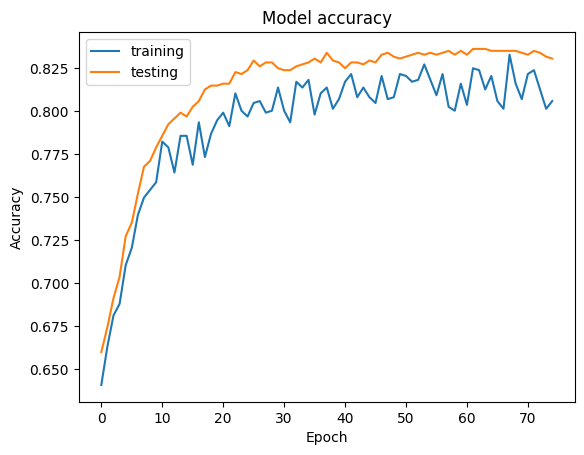

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

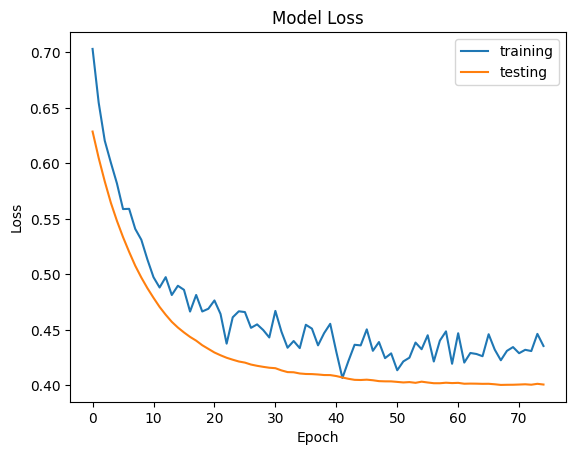

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Importing testing data and repeating same data prepping steps from above:

In [ ]:
#For the test data I have to: 

#clean the data

#create dummy variables

#scale continous variables

#then use model.predict for each row of test data and create survived output --> then create new submission df

# Data Prep:

In [ ]:
test_df = pd.read_csv("test (1).csv")

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
scaled_df.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
test_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [ ]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [ ]:
#replace missing age w/mean imputation:

test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

In [ ]:
test_df["Fare"].mean()

35.6271884892086

In [ ]:
test_df["Fare"].median()

14.4542

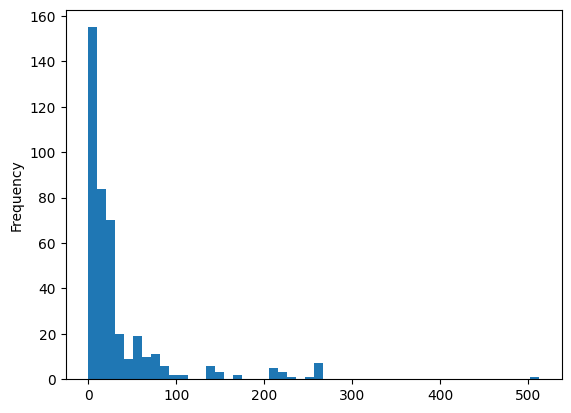

In [ ]:
#I can tell the data is rightward skewed with some high priced fare outliers

#let's confirm:

test_df["Fare"].plot(kind="hist", bins=50)
plt.show()

In [ ]:
#Becuase of this, let's use median to replace missing fare value --> more likely this is around the true value, compared to mean
#either way, not much of a big deal considering it's only for one missing observation compared to the data's 417 other observations


test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [ ]:
test_df["Pclass"] = test_df["Pclass"].astype("category")

In [ ]:
test_df1 = pd.get_dummies(test_df)

In [ ]:
test_df1.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [ ]:
#scale continuous features: age, sibsp, parch, and fare

temp = test_df1[["Age", "SibSp", "Parch", "Fare"]]

scaler = StandardScaler()
scaled_array = scaler.fit_transform(temp)
test_scaled_df = pd.DataFrame(scaled_array, columns=["Age", "SibSp", "Parch", "Fare"])

In [ ]:
#combine the dfs back together:

test_scaled_df[['Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']] = test_df1[['Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]

In [ ]:
test_scaled_df.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
### FIX THIS WE LOST PASSENGERID FROM THE ABOVE CODE AND SIMPLY LEFT JOINING ISNT GOOD ENOUGH TO REALLY 
#BE ENSURE THAT WE ARE REJOINING THE DATA ON THE ORIGINAL ROW THAT MATCHES THE DATA

In [ ]:
#methods: that could be used: merge(), join(), concat()

#temp fix left join passenger ID back into test_scaled_df:

test = pd.concat([test_scaled_df, test_df1["PassengerId"]], axis="columns")

In [ ]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId
0,0.334993,-0.499470,-0.400248,-0.497413,0,0,1,0,1,0,1,0,892
1,1.325530,0.616992,-0.400248,-0.512278,0,0,1,1,0,0,0,1,893
2,2.514175,-0.499470,-0.400248,-0.464100,0,1,0,0,1,0,1,0,894
3,-0.259330,-0.499470,-0.400248,-0.482475,0,0,1,0,1,0,0,1,895
4,-0.655545,0.616992,0.619896,-0.417492,0,0,1,1,0,0,0,1,896


In [ ]:
test_scaled_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.334993,-0.499470,-0.400248,-0.497413,0,0,1,0,1,0,1,0
1,1.325530,0.616992,-0.400248,-0.512278,0,0,1,1,0,0,0,1
2,2.514175,-0.499470,-0.400248,-0.464100,0,1,0,0,1,0,1,0
3,-0.259330,-0.499470,-0.400248,-0.482475,0,0,1,0,1,0,0,1
4,-0.655545,0.616992,0.619896,-0.417492,0,0,1,1,0,0,0,1


# Testing the model on test data:

In [ ]:
test["Age"].std()

1.001198322778645

In [ ]:
X_Test = test[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]



test["SurvivedProb"] = model.predict(X_Test)

14/14 [==============================] - 0s 1ms/step


In [ ]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,SurvivedProb
0,0.334993,-0.499470,-0.400248,-0.497413,0,0,1,0,1,0,1,0,892,0.081722
1,1.325530,0.616992,-0.400248,-0.512278,0,0,1,1,0,0,0,1,893,0.461784
2,2.514175,-0.499470,-0.400248,-0.464100,0,1,0,0,1,0,1,0,894,0.111869
3,-0.259330,-0.499470,-0.400248,-0.482475,0,0,1,0,1,0,0,1,895,0.140124
4,-0.655545,0.616992,0.619896,-0.417492,0,0,1,1,0,0,0,1,896,0.338020


In [ ]:
#Create yes or no for survival binary:

test.loc[(test["SurvivedProb"] >= .51, "Survived")] = 1
test.loc[(test["SurvivedProb"] < .51, "Survived")] = 0

In [ ]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,SurvivedProb,Survived
0,0.334993,-0.499470,-0.400248,-0.497413,0,0,1,0,1,0,1,0,892,0.081722,0.0
1,1.325530,0.616992,-0.400248,-0.512278,0,0,1,1,0,0,0,1,893,0.461784,0.0
2,2.514175,-0.499470,-0.400248,-0.464100,0,1,0,0,1,0,1,0,894,0.111869,0.0
3,-0.259330,-0.499470,-0.400248,-0.482475,0,0,1,0,1,0,0,1,895,0.140124,0.0
4,-0.655545,0.616992,0.619896,-0.417492,0,0,1,1,0,0,0,1,896,0.338020,0.0


In [ ]:
#Did it work? Let's check:
test.loc[(test["Survived"] == 1)].head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,SurvivedProb,Survived
6,-0.021601,-0.499470,-0.400248,-0.500999,0,0,1,1,0,0,1,0,898,0.663640,1.0
8,-0.972517,-0.499470,-0.400248,-0.508169,0,0,1,1,0,1,0,0,900,0.525601,1.0
12,-0.576302,0.616992,-0.400248,0.836992,1,0,0,1,0,0,0,1,904,0.985833,1.0
14,1.325530,0.616992,-0.400248,0.458892,1,0,0,1,0,0,0,1,906,0.964546,1.0
15,-0.497059,0.616992,-0.400248,-0.140826,0,1,0,1,0,1,0,0,907,0.919122,1.0


In [ ]:
#Putting together submission df

#for submission df we need to have only passenger ID and then survived

output_test_df = test[["PassengerId", "Survived"]]

In [ ]:
output_test_df.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [ ]:
# output_test_df = output_test_df.set_index("PassengerId")

In [ ]:
output_test_df.to_csv("retest.csv", index=False, sep=',')